In [2]:
# Importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import plotly.express as px

In [3]:
# Loading the data for covid 
total_covid_data = pd.read_csv('owid-covid-data.csv', low_memory=False)


#Loading data for world hapiness index 2020
world_2020 = pd.read_csv('WHR20_DataForFigure2.1.csv')

# Curating the data for COVID year when covid data (change with respect to comparing the total deaths)
covid_data = total_covid_data[total_covid_data['date'] == '2023-08-02']

In [4]:
# Renaming colums
column_name_mapping = {'location' : 'Country name'}
covid_data = covid_data.rename(columns=column_name_mapping)
covid_data.head(2)

,iso_code,continent,Country name,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1307,AFG,Asia,Afghanistan,2023-08-02,224305.0,40.0,21.714,7936.0,0.0,0.286,...,NaN,37.746,0.5,64.83,0.511,4.112877e+07,NaN,NaN,NaN,NaN
2636,OWID_AFR,NaN,Africa,2023-08-02,13105433.0,0.0,29.571,259002.0,0.0,0.286,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN


In [5]:
# Preparing datat for merge, such that only those countries fron COVID dataset 
# are accounted that are in world dataset

country_names = world_2020['Country name'].unique()

# Selecting those countries from covid data set that also had data about world hapiness index
selected_covid_data = covid_data[covid_data['Country name'].isin(country_names)]

country_data = selected_covid_data['Country name'].unique()

# Selecting those countries from world hapiness index set that also has covid data
selected_countries = world_2020[world_2020['Country name'].isin(country_data)]

In [6]:
# Merging data from these datasets

merged_data_covid = pd.merge(selected_countries, selected_covid_data, on='Country name')
merged_data_covid.head(2)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,22.6,NaN,3.28,81.91,0.938,5540745.0,NaN,NaN,NaN,NaN
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,18.8,NaN,2.50,80.90,0.940,5882259.0,NaN,NaN,NaN,NaN


In [7]:
# Countries with highest number of Covid cases and their ecomonic values ( DATA FROM 
most_covid_cases = merged_data_covid.sort_values(by=['total_cases_per_million'], ascending=True)[['Country name', 'total_cases_per_million', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy']]
n_most = most_covid_cases.head(15)

In [8]:
n_most['Country name'].tolist()

['Yemen',
 'Niger',
 'Chad',
 'Tanzania',
 'Sierra Leone',
 'Burkina Faso',
 'Nigeria',
 'Mali',
 'Liberia',
 'South Sudan',
 'Tajikistan',
 'Benin',
 'Nicaragua',
 'Madagascar',
 'Central African Republic']

<Axes: xlabel='Country name'>

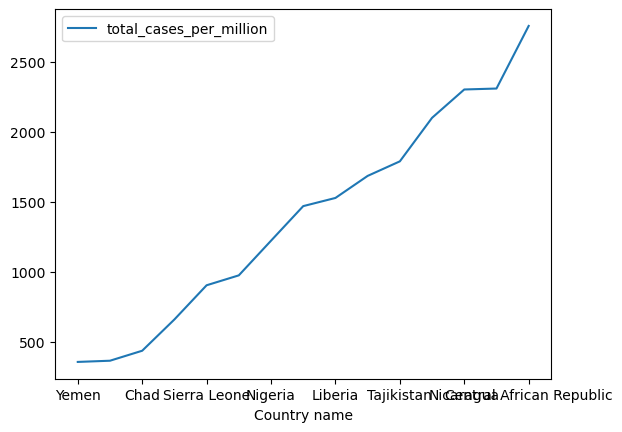

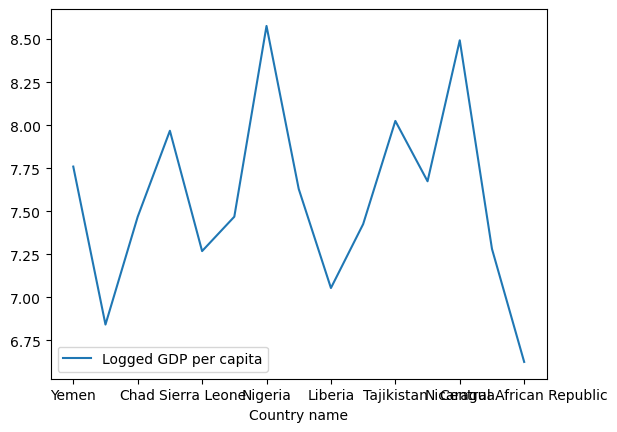

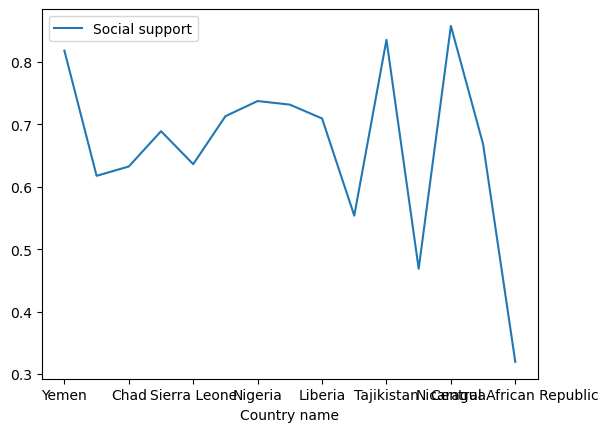

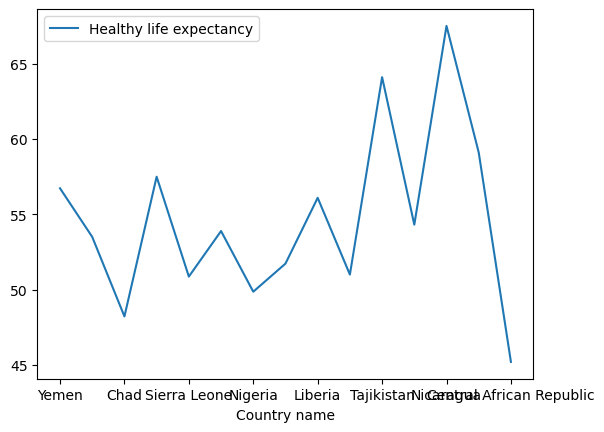

In [9]:
# Visualizing the information for total cases per million during COVID
n_most.plot(x='Country name', y='total_cases_per_million', legend=True)
n_most.plot(x='Country name', y='Logged GDP per capita', legend=True)
n_most.plot(x='Country name', y='Social support', legend=True)
n_most.plot(x='Country name', y='Healthy life expectancy', legend=True)

In [10]:
## In this section, I compare total cases and total deaths w.r.t to the whole world continent wise
## Effects on human life factors, medical facilities and GDP

In [11]:
location_data = covid_data.groupby(['Country name', 'continent'], as_index=False).max('2023-08-02')

In [12]:
location_data['Death_Percentage'] = (location_data.total_deaths_per_million / location_data.total_cases_per_million)*100

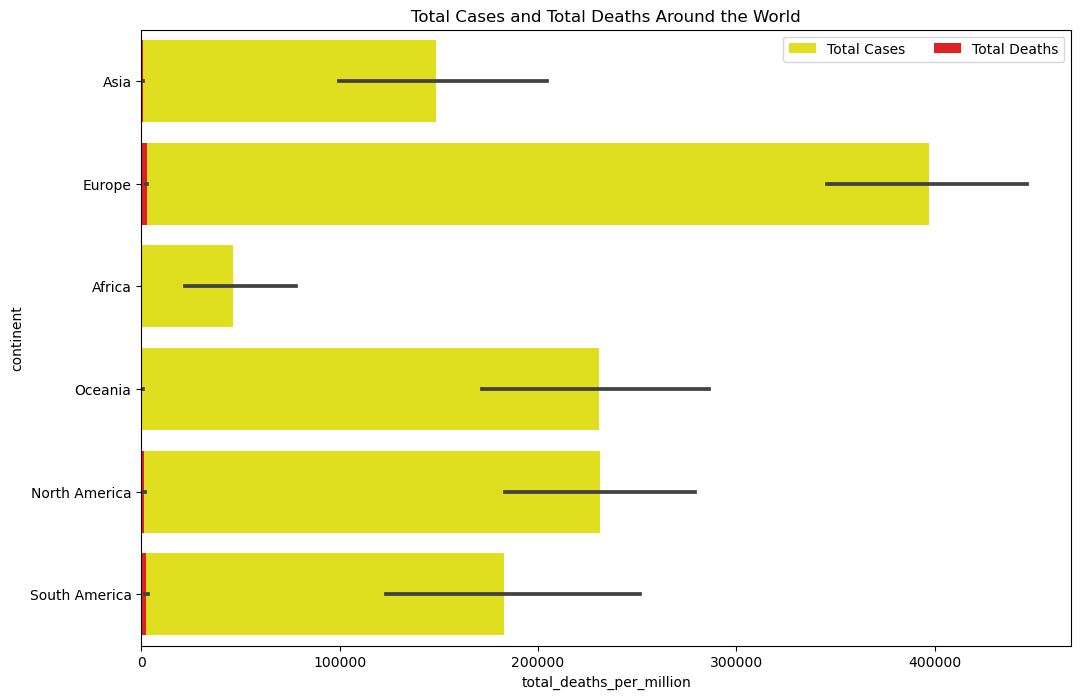

In [17]:
f, ax = plt.subplots(figsize=(12, 8))
data = location_data[['continent','total_cases_per_million','total_deaths_per_million']]
data.sort_values('total_cases_per_million',ascending=False)
sns.barplot(x="total_cases_per_million", y="continent", data=location_data,label="Total Cases", color="yellow")
sns.barplot(x="total_deaths_per_million", y="continent", data=location_data, label="Total Deaths", color="red")
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set_title('Total Cases and Total Deaths Around the World')
plt.savefig('Total Cases and Total Deaths Around the World')

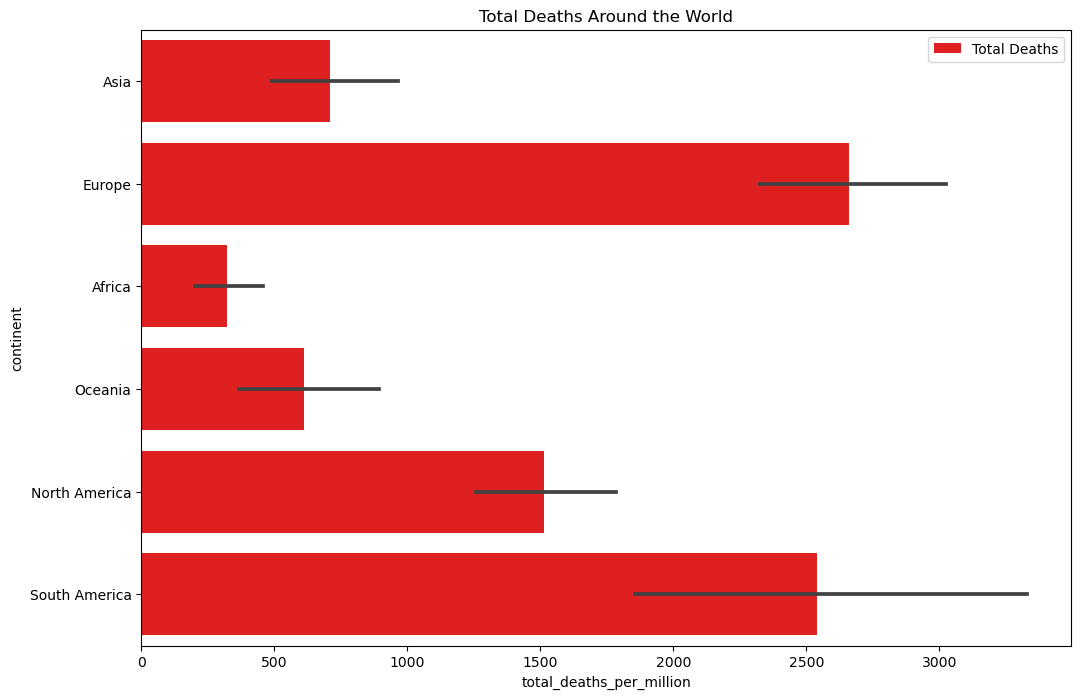

In [15]:
f, ax = plt.subplots(figsize=(12, 8))
data = location_data[['continent','total_deaths_per_million']]
data.sort_values('total_deaths_per_million',ascending=False)
sns.barplot(x="total_deaths_per_million", y="continent", data=location_data, label="Total Deaths", color="red")
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set_title('Total Deaths Around the World')
plt.savefig('Total Deaths Around the World')

In [14]:
# FInding co-relation of deaths per million w.r.t to the basic human factor features from the dataset
correlation_data = merged_data_covid[['total_deaths_per_million','aged_65_older','aged_70_older',
 'cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers',
 'human_development_index','total_cases_per_million']].corr()['total_deaths_per_million']

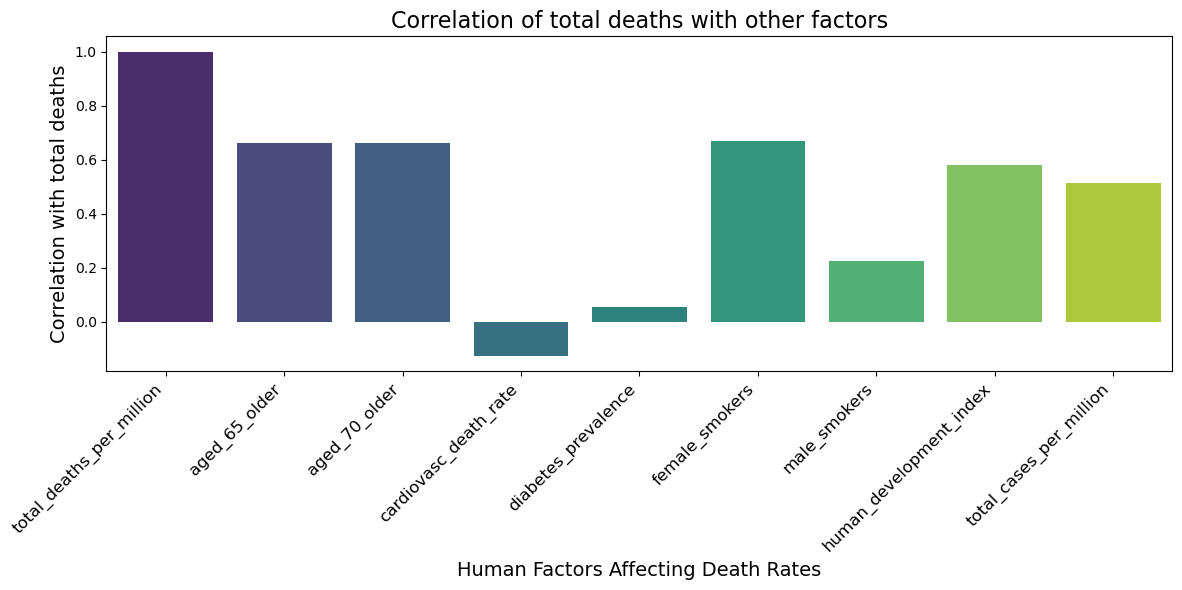

In [53]:
# Creating a co-relation w.r.t total_deaths_per_million
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=correlation_data.index, y=correlation_data.values, palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Human Factors Affecting Death Rates', fontsize=14)
plt.ylabel('Correlation with total deaths', fontsize=14)
plt.title('Correlation of total deaths with other factors', fontsize=16)
plt.tight_layout()
plt.savefig('correlation.png')
plt.show()

In [54]:
# Filtering the data to include only relevant columns

#total_cases_per_million': This can provide insight into the whole number of cases in keeping with million humans, which may correlate with demise fees.
#'diabetes_prevalence': The occurrence of diabetes can be a contributing aspect to loss of life costs.
#'cardiovasc_death_rate': Cardiovascular dying charge might be associated with COVID-19 dying quotes.
#'aged_65_older' and 'aged_70_older': The percentage of the populace that is older might be a enormous issue.
#'gdp_per_capita': The GDP per capita will be related to healthcare infrastructure.
#'life_expectancy': Life expectancy would possibly affect how the populace responds to the virus.
#'human_development_index': A better human development index would possibly indicate better healthcare and socioeconomic situations.

selected_columns = ['Country name','total_cases_per_million','total_deaths_per_million','diabetes_prevalence', 'cardiovasc_death_rate', 'aged_65_older', 'aged_70_older',
                   'gdp_per_capita', 'life_expectancy','human_development_index', 'stringency_index',
                    'population_density','median_age','weekly_hosp_admissions_per_million',  'weekly_icu_admissions_per_million',
'new_tests_smoothed_per_thousand','new_vaccinations_smoothed_per_million','population_density','handwashing_facilities',
 'hospital_beds_per_thousand','excess_mortality_cumulative_per_million','population','total_boosters_per_hundred']

In [51]:
# Performing PCA for countries with highest death rates
#Principal Component Analysis (PCA) helps to identify the most significant features that may contribute to the total deaths in each country. 
#PCA is a dimensionality reduction technique that can help to identify patterns and relationships in data.


data_for_pca = covid_data[selected_columns]
data_for_pca.head(2)
# Handling missing values as such
data_for_pca.fillna(0, inplace=True)
features_for_pca = data_for_pca.set_index('Country name')

/tmp/ipykernel_582/154898648.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_pca.fillna(0, inplace=True)


In [42]:
# Normalizing the data (mean=0, std=1) (Standardinzing)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_for_pca)

array([[-0.96825137, -0.80203224,  0.46180379, ...,  0.        ,
        -0.13280612, -0.31122894],
       [-0.9493081 , -0.81088212, -1.2656026 , ...,  0.        ,
         1.96061114,  0.03957819],
       [-0.39928636,  0.03105266,  0.55006543, ...,  0.        ,
        -0.19065043, -0.31122894],
       ...,
       [-0.99413546, -0.90190953, -0.30192959, ...,  0.        ,
        -0.14403485, -0.31122894],
       [-0.90736283, -0.79403868, -0.55590696, ...,  0.        ,
        -0.1647014 , -0.31122894],
       [-0.91329809, -0.68034024, -0.93777365, ...,  0.        ,
        -0.17028713, -0.31122894]])

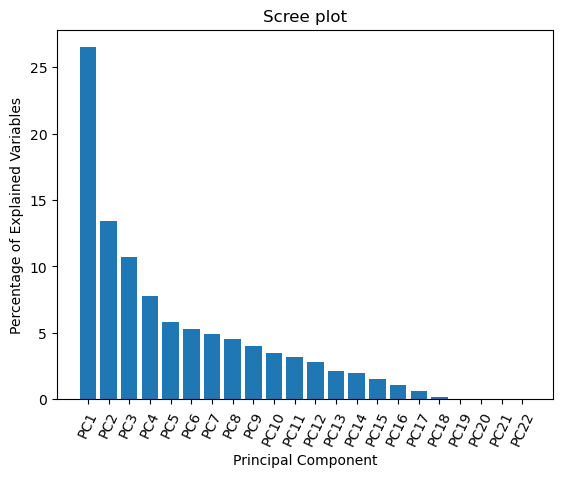

In [40]:
# Performing PCA
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Plotting the values
per_ver = np.round(pca.explained_variance_ratio_* 100,decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_ver)+1)]

plt.bar(x=range(1, len(per_ver)+1), height=per_ver, tick_label=labels)
plt.ylabel('Percentage of Explained Variables')
plt.xlabel('Principal Component')
plt.xticks(rotation=65)
plt.title('Scree plot')
plt.savefig('Scree plot.png')
plt.show()

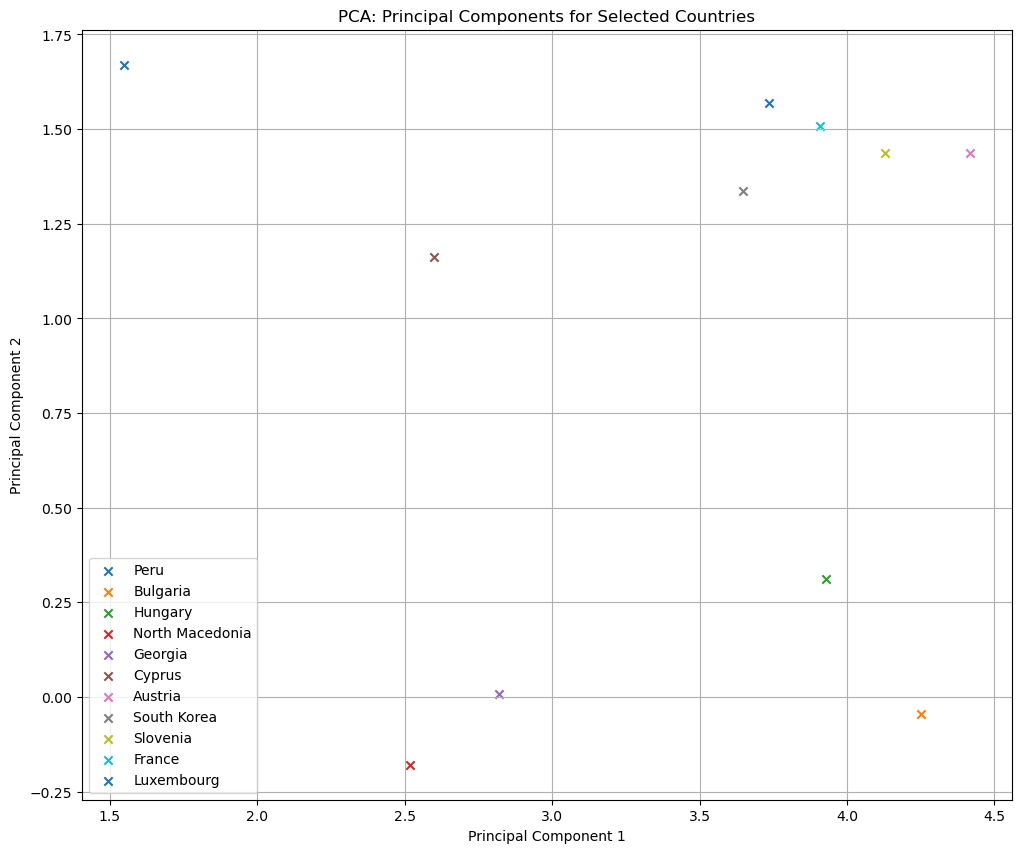

In [19]:

# Creating a DataFrame with the principal components
pca_all_components = PCA()
all_principal_components = pca_all_components.fit_transform(scaled_data)
principal_components_df = pd.DataFrame(all_principal_components, columns=labels, index=features_for_pca.index)

# Plotting the first two principal components (PC1 and PC2) for selected countries with most covid deaths 
# and least covid deaths, to identify a pattern among them
selected_countries = ['Peru','Bulgaria','Hungary', 'North Macedonia', 'Georgia','Cyprus', 'Austria',
                      'South Korea', 'Slovenia', 'France', 'Luxembourg']

plt.figure(figsize=(12, 10))

for i, country in enumerate(selected_countries):
    country_pc1 = principal_components_df.loc[country, 'PC1']
    country_pc2 = principal_components_df.loc[country, 'PC2']
    
    # Scatter plot for each country with a unique color and label
    plt.scatter(country_pc1, country_pc2, label=country, marker='x')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Components for Selected Countries')
plt.legend()
plt.grid()
plt.show()

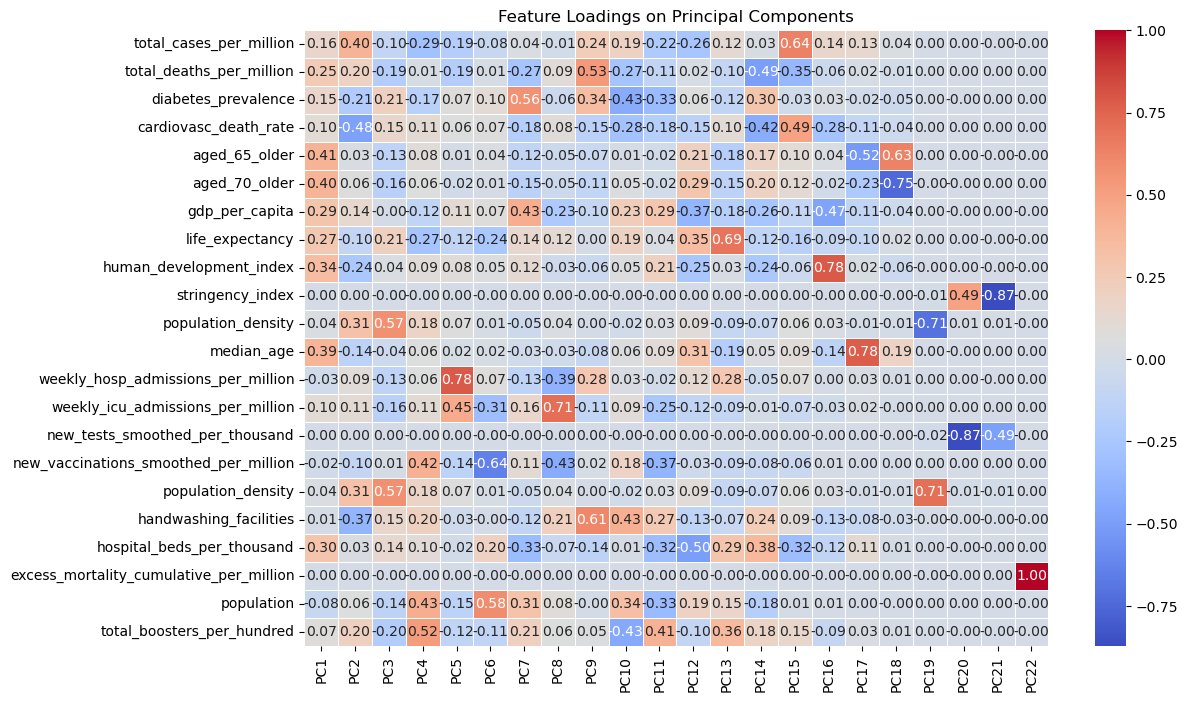

In [46]:

loadings_df = pd.DataFrame(pca.components_.T, columns=labels, index=features_for_pca.columns)

# Ploting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Feature Loadings on Principal Components')
plt.savefig('Heatmap.png')
plt.show()

In [ ]:
# Applying PCA for dimensionality reduction, pattern discovery and Visualization
